1. Data Exploration: Understanding the dataset, checking for data types, missing values, and getting a sense of data distribution.
2. Data Cleaning: Handling missing values, outliers, and any data inconsistencies.
3. Feature Engineering: Creating new features from existing ones if necessary.
4. Data Visualization: Creating plots to understand relationships between variables.
5. Model Selection: Choosing appropriate machine learning models for the task.
6. Model Training: Training the selected models on the dataset.
7. Model Evaluation: Evaluating the models using appropriate metrics.
8. Model Optimization: Tuning the models to improve performance.
9. Deployment: Creating a simple web application with either Gradio or Streamlit to showcase the model.
10. Model Inference: Testing the deployed model with sample input.

## Understand the Problem Statement
**Goal**: Predict the price per square meter of real estate in Taiwan based on features such as the distance to the nearest MRT station, the number of convenience stores, and the age of the house.

### 1. Importing libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Data Collection

In [56]:
df = pd.read_csv('taiwan_real_estate2.csv')

In [57]:
df.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


### 3. Data Exploration

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


- dist_to_mrt_m: Distance to the nearest MRT (Mass Rapid Transit) station in meters.
- n_convenience: Number of convenience stores accessible within walking distance.
- house_age_years: Age of the house in years, categorized into ranges.
- price_twd_msq: Price of the house per square meter in Taiwanese dollars.

In [59]:
df.isnull().sum()

dist_to_mrt_m      0
n_convenience      0
house_age_years    0
price_twd_msq      0
dtype: int64

In [60]:
df.describe()

,dist_to_mrt_m,n_convenience,price_twd_msq
count,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,11.491738
std,1262.109595,2.945562,4.116940
min,23.382840,0.000000,2.299546
25%,289.324800,1.000000,8.381241
50%,492.231300,4.000000,11.633888
75%,1454.279000,6.000000,14.099849
max,6488.021000,10.000000,35.552194


### 4. Data Cleaning

In [61]:
# map each age range to its midpoint for better representation in the model

age_map = {
    '0 to 15': 7.5, # mindpoint range
    '15 to 30' : 22.5, # mindpoint range
    '30 to 45' : 37.5 # mindpoint range
}

# apply the mapping to the house_age_years column
df['house_age_years'] = df['house_age_years'].map(age_map)
df.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,37.5,11.467474
1,306.59470,9,22.5,12.768533
2,561.98450,5,7.5,14.311649
3,561.98450,5,7.5,16.580938
4,390.56840,5,7.5,13.040847


### 5. Feature Engineering
- **Action**: Evaluate if new features can be created from existing ones to improve the model's performance.
- **Learn**: How to enhance data through feature creation and transformation.

In this dataset, it doesn't seem like we have a clear opportunity for creating new features without additional information. The existing features are straightforward and relevant for our prediction task.

### 6. Data Visualisation

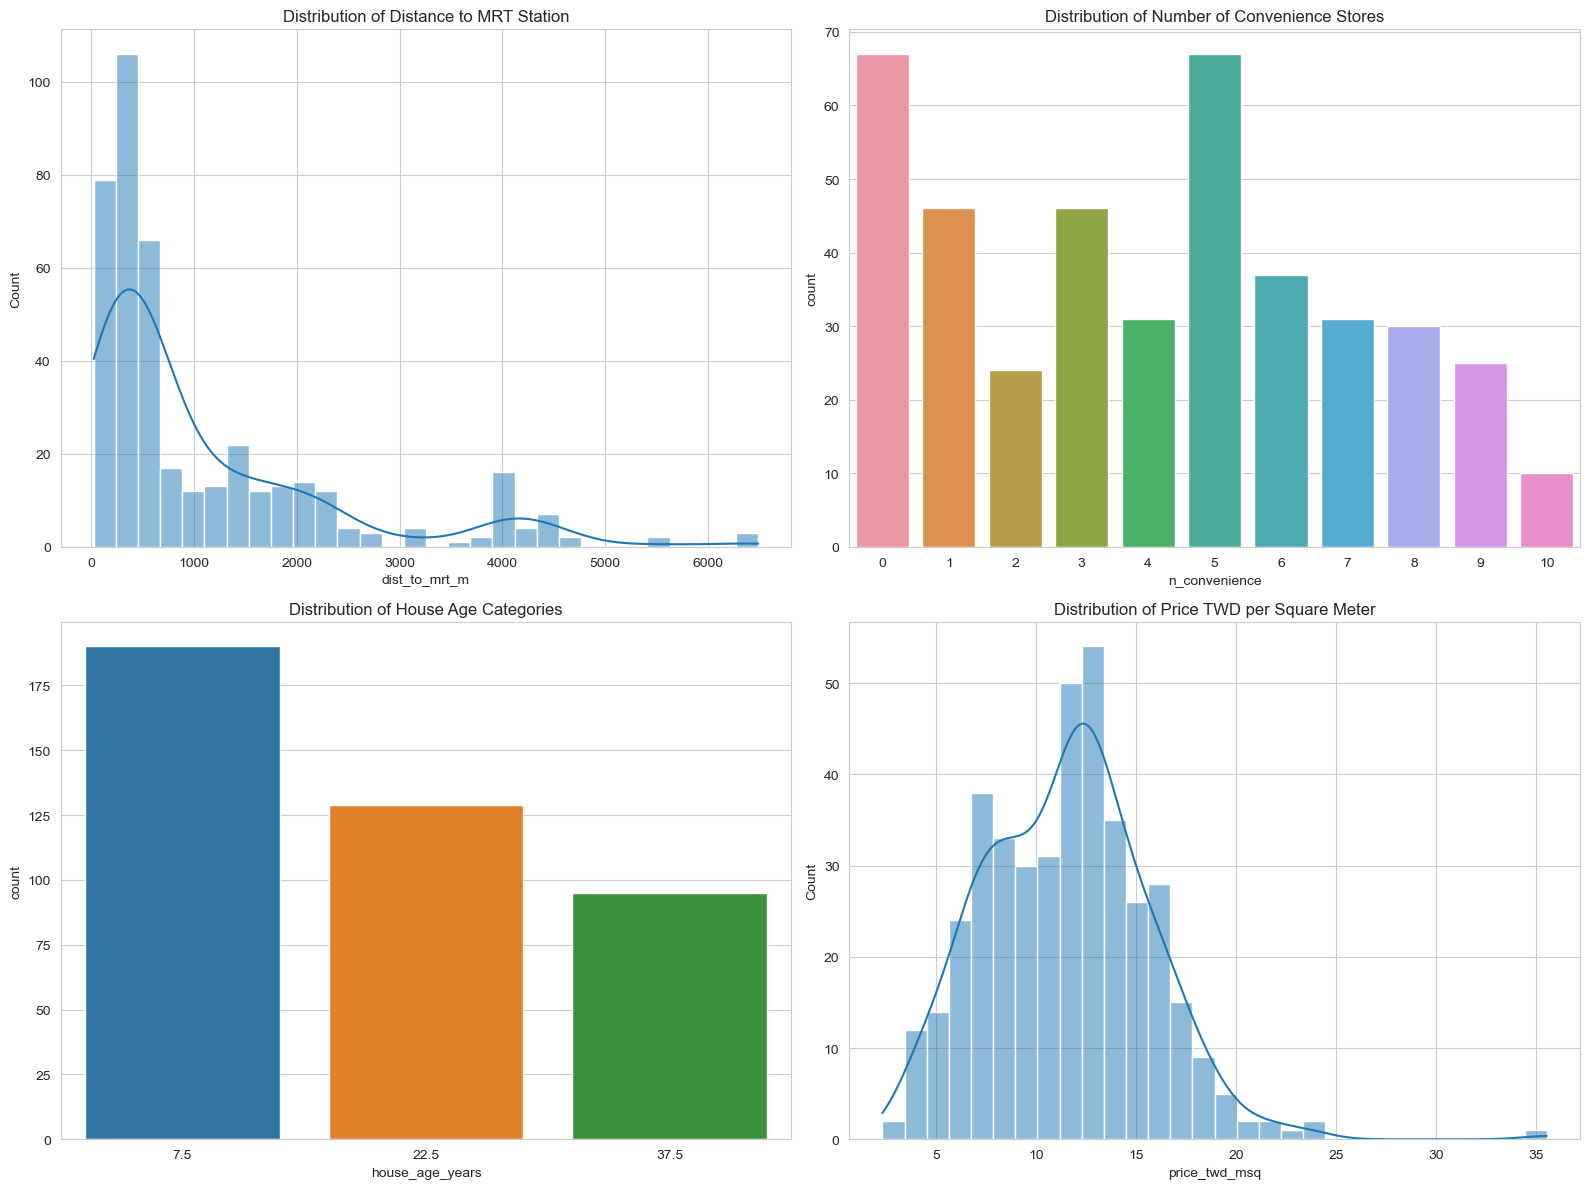

In [62]:
# set style of plots and prepare the figure layout
sns.set_style('whitegrid')
# plt.subplots(row,column,figsize=(width,height)
fig,axes = plt.subplots(2,2,figsize=(16,12))


# Plotting distribution of distance to MRT station
sns.histplot(df['dist_to_mrt_m'], bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title("Distribution of Distance to MRT Station")


# Plotting distribution of number of convenience stores
sns.countplot(x='n_convenience', data=df, ax=axes[0,1])
axes[0,1].set_title("Distribution of Number of Convenience Stores")


# Plotting distribution of house age categories
sns.countplot(x='house_age_years', data=df, ax=axes[1,0])
axes[1,0].set_title("Distribution of House Age Categories")

# Plotting distribution of price per square meter
sns.histplot(df['price_twd_msq'], bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title("Distribution of Price TWD per Square Meter")

# Adjust layout
plt.tight_layout()
plt.show()

1. Distribution of Distance to MRT Station: The distribution is right-skewed, indicating that most of the properties are located close to an MRT station, but there are a few properties that are much further away.
2. Distribution of Number of Convenience Stores: This is a discrete distribution showing the count of properties that have a specific number of convenience stores in walking distance. The numbers are fairly well spread out, with properties having access to 0 to 10 convenience stores.
3. Distribution of House Age Categories: We see the count of properties in each of the three age categories. It looks like there's a fairly even distribution across these categories.
4. Distribution of Price TWD per Square Meter: The price distribution is also right-skewed, with most of the properties clustered at the lower end of the price range.

---

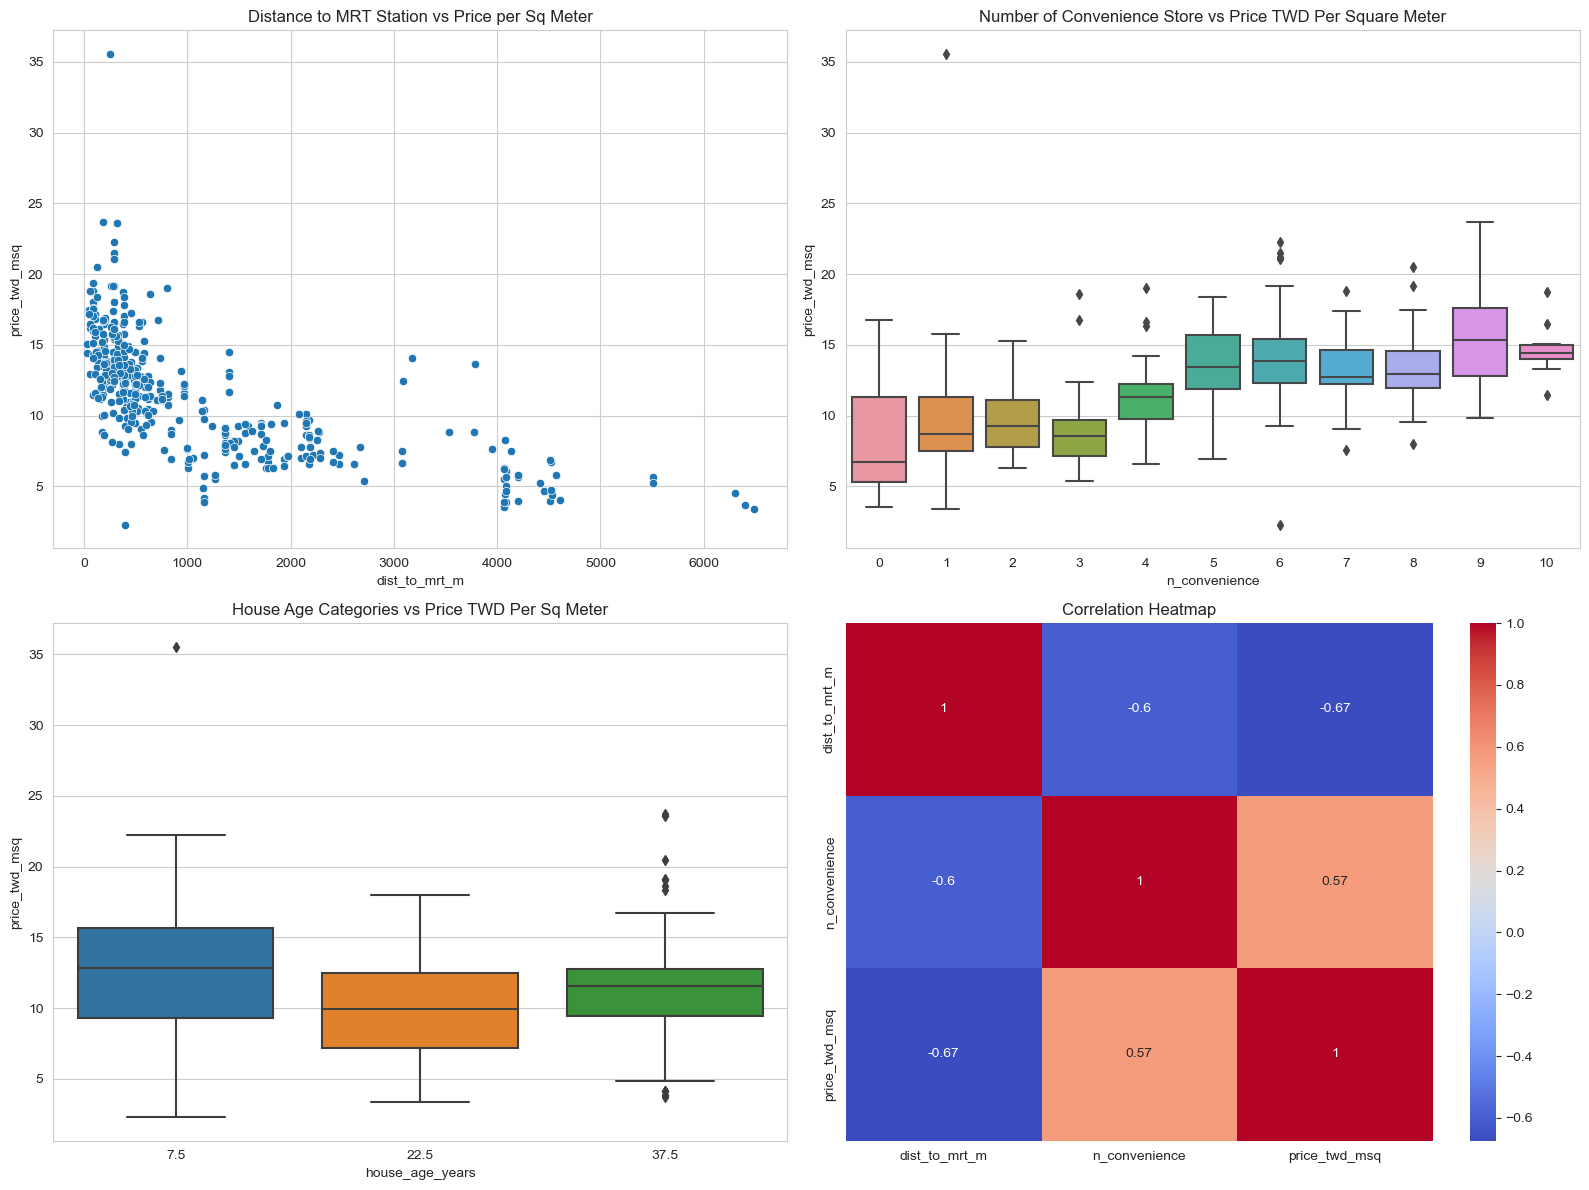

In [63]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

sns.scatterplot(data=df, x='dist_to_mrt_m', y='price_twd_msq', ax=axes[0,0])
axes[0,0].set_title("Distance to MRT Station vs Price per Sq Meter")

sns.boxplot(data=df, x='n_convenience', y='price_twd_msq', ax=axes[0,1])
axes[0,1].set_title("Number of Convenience Store vs Price TWD Per Square Meter")

sns.boxplot(data=df, x='house_age_years', y='price_twd_msq', ax=axes[1,0])
axes[1,0].set_title("House Age Categories vs Price TWD Per Sq Meter")

corr = df[['dist_to_mrt_m','n_convenience', 'price_twd_msq']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')


plt.tight_layout()
plt.show()

1. Distance to MRT Station vs Price: There appears to be a negative relationship between the distance to the nearest MRT station and the price per square meter. As the distance increases, the price tends to decrease.
2. Number of Convenience Stores vs Price: The median price per square meter generally increases with the number of convenience stores nearby. Properties with more convenience stores nearby tend to have a higher price.
3. House Age Categories vs Price: The boxplot shows the spread of prices within each house age category. It seems that newer houses (0 to 15 years) have a higher median price, and the price tends to decrease with the age of the house.
4. Correlation Heatmap: The heatmap of the correlation matrix shows that there is a significant negative correlation between the distance to MRT and price (-0.67) and a positive correlation between the number of convenience stores and price (0.57).

---

### 7. Preprocessing

- **Action**: Scale the features and split the dataset into training and testing sets.
- **Learn**: The importance of feature scaling and how to use train_test_split.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [65]:
# Define the feature (X) and the therget (y)
X = df.drop('price_twd_msq', axis=1)
y = df['price_twd_msq']

print(X.head())
print('*'*100)
print(y.head())

   dist_to_mrt_m  n_convenience  house_age_years
0       84.87882             10             37.5
1      306.59470              9             22.5
2      561.98450              5              7.5
3      561.98450              5              7.5
4      390.56840              5              7.5
****************************************************************************************************
0    11.467474
1    12.768533
2    14.311649
3    16.580938
4    13.040847
Name: price_twd_msq, dtype: float64


In [66]:
# Split the data into training and testing tes (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [67]:
# Standardize the feature
scaler = StandardScaler()
X_train_scaled_df = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scale_df:\n {X_train_scaled_df[:10]}")
print("*"*100)
print(f"X_test_scaled:\n {X_test_scaled[:5]}")

X_train_scale_df:
 [[-0.697543    1.33599305  1.4887407 ]
 [-0.73419126 -0.01841338 -0.99374379]
 [-0.46665268 -0.01841338  0.24749845]
 [-0.6013431   0.32018823 -0.99374379]
 [ 0.2595509  -1.0342182  -0.99374379]
 [ 0.29160244 -0.35701499  0.24749845]
 [ 0.28195524 -0.01841338  0.24749845]
 [-0.55110366  0.32018823  0.24749845]
 [-0.64019043  0.99739144 -0.99374379]
 [-0.41171268  0.65878983 -0.99374379]]
****************************************************************************************************
X_test_scaled:
 [[-0.56013628  0.32018823 -0.99374379]
 [-0.62961858  0.65878983 -0.99374379]
 [ 0.4559466  -0.69561659 -0.99374379]
 [ 0.03294272 -1.37281981  1.4887407 ]
 [-0.6620156   0.99739144 -0.99374379]]


The key difference between fit_transform() and transform() when using a StandardScaler is:

- fit_transform() fits the scaler to the training data and transforms the training data. This learns the scaling parameters (mean and standard deviation) from the training set and applies the scaling to the training set.

- transform() only applies the previously learned scaling parameters to transform new data. This uses the mean and standard deviation computed on the training set to transform the test set. 

So in summary:

- fit_transform() - Fits scaler to training data and transforms training data
- transform() - Applies previously learned parameters to transform new data

The code is doing:

1. Fitting the StandardScaler to the training data (X_train) and transforming X_train in one step with fit_transform(). This returns the scaled training data.

2. Just transforming the test data (X_test) using the transform() method and previously learned parameters from fitting to X_train.

This ensures the training and test data are scaled similarly using the parameters learned from the training data.

In [68]:
# Convert scalled arrays back to dataframe for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled_df, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.head()

,dist_to_mrt_m,n_convenience,house_age_years
0,-0.697543,1.335993,1.488741
1,-0.734191,-0.018413,-0.993744
2,-0.466653,-0.018413,0.247498
3,-0.601343,0.320188,-0.993744
4,0.259551,-1.034218,-0.993744


In [69]:
X_test_scaled.head()

,dist_to_mrt_m,n_convenience,house_age_years
0,-0.560136,0.320188,-0.993744
1,-0.629619,0.658790,-0.993744
2,0.455947,-0.695617,-0.993744
3,0.032943,-1.372820,1.488741
4,-0.662016,0.997391,-0.993744


### 8. Model Selection

- **Action**: Choose a machine learning model that is appropriate for the regression task.
- **Learn**: Understanding different types of regression models and their suitability.

For this task, we will start with a simple Linear Regression model to establish a baseline.

### 9. Model Training

- **Action**: Train the Linear Regression model using the training data.
- **Learn**: How to fit a model to data and interpret initial results.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train_scaled_df, y_train)

# Predict on the training model
train_predictions = linear_regression_model.predict(X_train_scaled_df)

In [72]:
train_predictions[:10]

array([13.14436293, 13.62080662, 12.06665091, 13.76565553, 10.41138148,
       10.1458004 , 10.57464778, 12.64458497, 14.66231999, 13.79733528])

# Evaluate the model performance on the training set

train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = train_mse ** 0.5
train_r2 = r2_score(y_train, train_predictions)

(train_mse, train_rmse, train_r2)

print(f"Training set model performance\n\nMean Squared Error: {train_mse}\nRoot Mean Squared Error: {train_rmse}\nR-Squared: {train_r2}")

- RMSE indicates that, on average, the model's predictions are about 2.816 TWD per square meter off from the actual prices. 
- The R2 value, which ranges from 0 to 1, tells us that roughly 50.3% of the variation in the price per square meter can be explained by the model. 
- This is a baseline model; the performance might not be ideal, but it gives us a starting point.

### 10. Model Evaluation

- **Action** : Evaluate the model's performance on the testing set to understand how well it generalizes to new data.
- **Learn**  : The importance of using a holdout set for a realistic performance measure.

In [73]:
# Predict on the testing data
test_prediction = linear_regression_model.predict(X_test_scaled)
# print(test_prediction)
# Evaluate the model performance on the testing set
test_mse = mean_squared_error(y_test, test_prediction)
test_rmse = test_mse**0.5
test_r2 = r2_score(y_test, test_prediction)


print(f"Test set model performance\n\nMean Squared Error: {test_mse}\nRoot Mean Squared Error: {test_rmse}\nR-Squared: {test_r2}")

Test set model performance

Mean Squared Error: 8.025183951882788
Root Mean Squared Error: 2.832875562371702
R-Squared: 0.5243168774203952


- The metrics on the test set evaluate model performance on new unseen data, representing its generalization ability.
- The training set metrics evaluate model fit on the data the model was trained on.
- The training MSE and RMSE are slightly better than the test set. This is expected since the model has seen and fit the training data.
- But there is not a huge gap between training and test performance. This suggests the model is not heavily overfitting.
- The R-squared on both sets are fairly similar as well, showing the model fits the training data well while still generalizing decently to new data.


So in summary, evaluating metrics on both training and test data provides a view into both model fit and generalization ability. The small gap between them here indicates reasonable model fit without severe overfitting. Comparing them helps get a complete picture of model performance.
Copy


### 11. Model Optimisation

- **Action**: Explore if the model's performance can be improved through hyperparameter tuning or using a more complex model.
- **Learn**: How adjusting model parameters or choosing a more complex model can affect performance.

For Linear Regression, there aren't hyperparameters to tune, but we can explore more complex models or feature engineering. However, before moving to a more complex model, let's visualize the residuals to understand where the model might be going wrong.

For model optimization, since we're dealing with a regression problem, we could consider several alternative models that may capture the relationships in the data more effectively than a simple linear regression. Here are a few common approaches:

- **Polynomial Regression**: Captures non-linear relationships by adding polynomial features.
- **Ridge Regression**: A regularization method that adds a penalty term to the cost function to prevent overfitting.
- **Lasso Regression**: Another regularization method that can also perform feature selection by shrinking coefficients for less important features to zero.
- **Elastic Net Regression**: Combines the penalties of Ridge and Lasso regression.
- **Decision Tree Regression**: A non-linear model that splits the data into branches to make predictions.
- **Random Forest Regression**: An ensemble of decision trees which averages the predictions to improve performance and control over-fitting.
- **Gradient Boosting Machines (GBM)**: An ensemble technique that builds trees sequentially, each one correcting the errors of the previous one.

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
import pandas as pd

In [75]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    # Iniatialise a dictionary to store the results
    model_results = {
        'Model':[],
        'Train RMSE': [],
        'Test RMSE': [],
        "Train R2" :[],
        "Test R2": [],
        "Train MAE" :[],
        "Test MAE":[],
    }
    
    # Iterate over the list of models
    for model in models:
        # Get the model's name (type) and fit it to the training data
        model_name = type(model).__name__
        model.fit(X_train, y_train)
        
        # predict on the training set and the test set
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        
        #Calculate metrics for the training set
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        train_r2 = r2_score(y_train, train_predictions)
        train_mae = mean_absolute_error(y_train, train_predictions)
        
        # Calculate metrics for the test set
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        test_r2 = r2_score(y_test, test_predictions)
        test_mae = mean_absolute_error(y_test, test_predictions)
        
        # Append the results to the dicitionary
        
        model_results['Model'].append(model_name)
        model_results['Train RMSE'].append(train_rmse)
        model_results['Test RMSE'].append(test_rmse)
        model_results['Train R2'].append(train_r2)
        model_results['Test R2'].append(test_r2)
        model_results['Train MAE'].append(train_mae)
        model_results['Test MAE'].append(test_mae)
    
    results_df = pd.DataFrame(model_results)
    return results_df


models_to_evaluate = [
    LinearRegression(),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Use the function to evalute the models

model_performance_summary = evaluate_models(models_to_evaluate, X_train_scaled_df, X_test_scaled, y_train, y_test)
model_performance_summary
        

,Model,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,LinearRegression,2.816467,2.832876,0.528789,0.524317,1.957526,2.123714
1,Ridge,2.816474,2.833849,0.528786,0.523990,1.957497,2.124520
2,Lasso,3.137422,3.216461,0.415274,0.386776,2.276728,2.437526
3,ElasticNet,3.096065,3.186253,0.430588,0.398240,2.245814,2.428646
4,DecisionTreeRegressor,0.663118,2.345621,0.973879,0.673879,0.334144,1.516907
5,RandomForestRegressor,1.135154,2.186051,0.923455,0.716741,0.774053,1.429430
6,GradientBoostingRegressor,1.390188,2.200977,0.885197,0.712860,1.037689,1.527332


In [76]:
def compare_train_test_similarity(evaluation_results):
    # Initialize a dictionary to store the comparison results
    comparison_results = {
        'Model': [],
        'RMSE Similarity (%)': [],
        'R2 Similarity (%)': [],
        'MAE Similarity (%)': []
    }
    
    # Iterate over each row in the evaluation results DataFrame
    for _, row in evaluation_results.iterrows():
        # Calculate percentage similarity between train and test for each metric
        rmse_similarity = 100 - (abs(row['Train RMSE'] - row['Test RMSE']) / ((row['Train RMSE'] + row['Test RMSE']) / 2) * 100)
        r2_similarity = 100 - (abs(row['Train R2'] - row['Test R2']) / ((row['Train R2'] + row['Test R2']) / 2) * 100)
        mae_similarity = 100 - (abs(row['Train MAE'] - row['Test MAE']) / ((row['Train MAE'] + row['Test MAE']) / 2) * 100)
        
        # Append the results to the dictionary
        comparison_results['Model'].append(row['Model'])
        comparison_results['RMSE Similarity (%)'].append(rmse_similarity)
        comparison_results['R2 Similarity (%)'].append(r2_similarity)
        comparison_results['MAE Similarity (%)'].append(mae_similarity)
    
    # Convert the comparison results dictionary to a DataFrame for display
    similarity_df = pd.DataFrame(comparison_results)
    return similarity_df

# Assuming 'model_performance_summary' contains the evaluation results from the previous function
# We can use this new function to compare the similarity
similarity_summary = compare_train_test_similarity(model_performance_summary)
similarity_summary

# Note: The execution of this function depends on the availability of the 'model_performance_summary' DataFrame.
# If 'model_performance_summary' is available, uncomment the above two lines to calculate and display the similarity summary.


,Model,RMSE Similarity (%),R2 Similarity (%),MAE Similarity (%)
0,LinearRegression,99.419095,99.150708,91.855980
1,Ridge,99.384996,99.088787,91.816646
2,Lasso,97.512098,92.893533,93.178210
3,ElasticNet,97.128853,92.194296,92.177410
4,DecisionTreeRegressor,-11.841108,63.586900,-27.793691
5,RandomForestRegressor,36.715958,74.794014,40.514437
6,GradientBoostingRegressor,54.845364,78.431682,61.821503


### 12. Interpretation of Results

- **Action**: Interpret the model's coefficients and the residual plots.
- **Learn**: Understand the model's predictions and where it might have shortcomings.

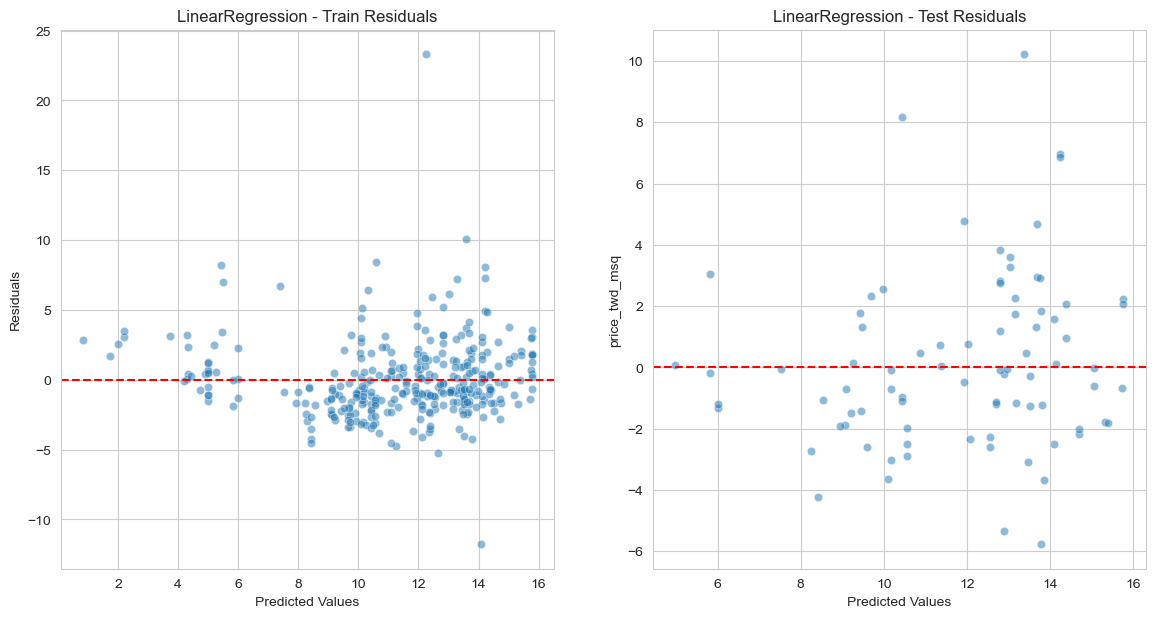

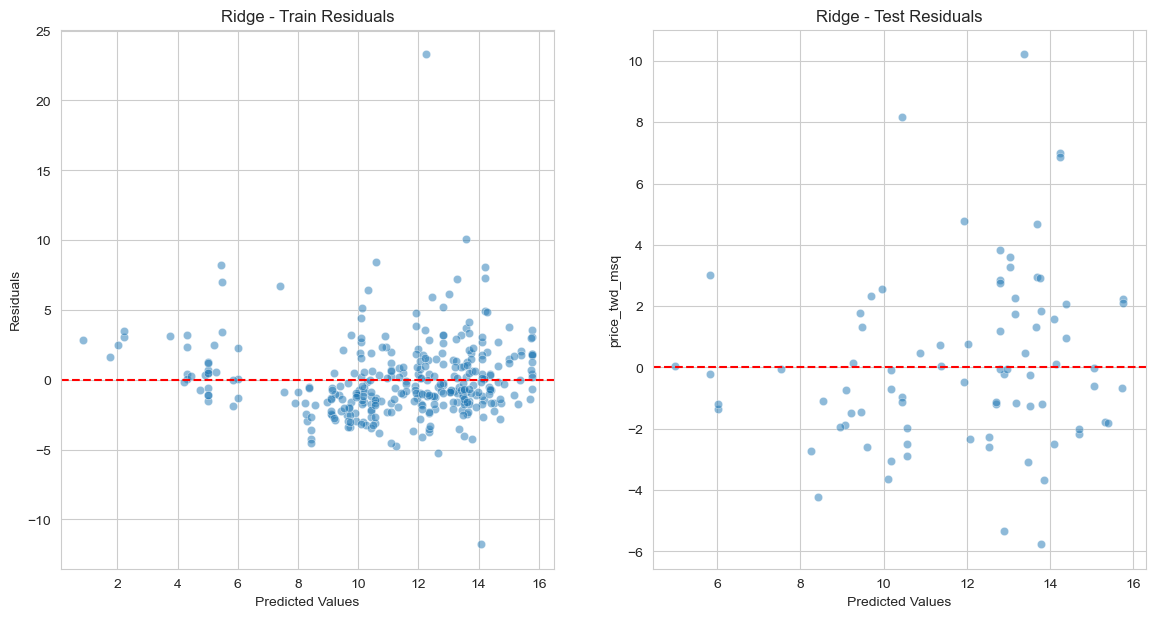

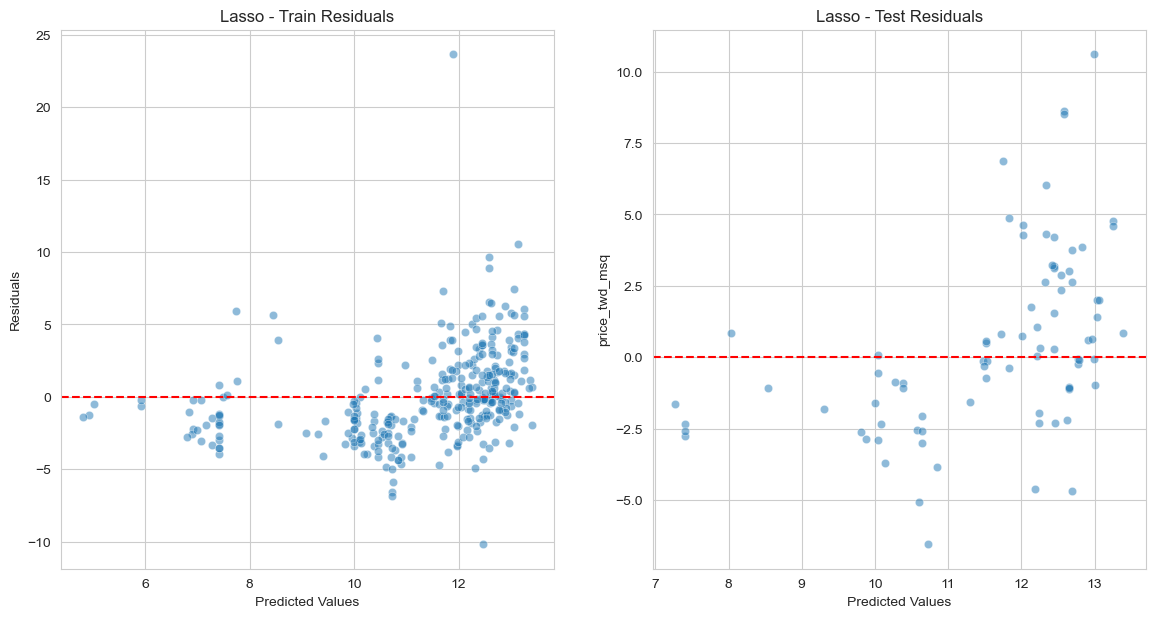

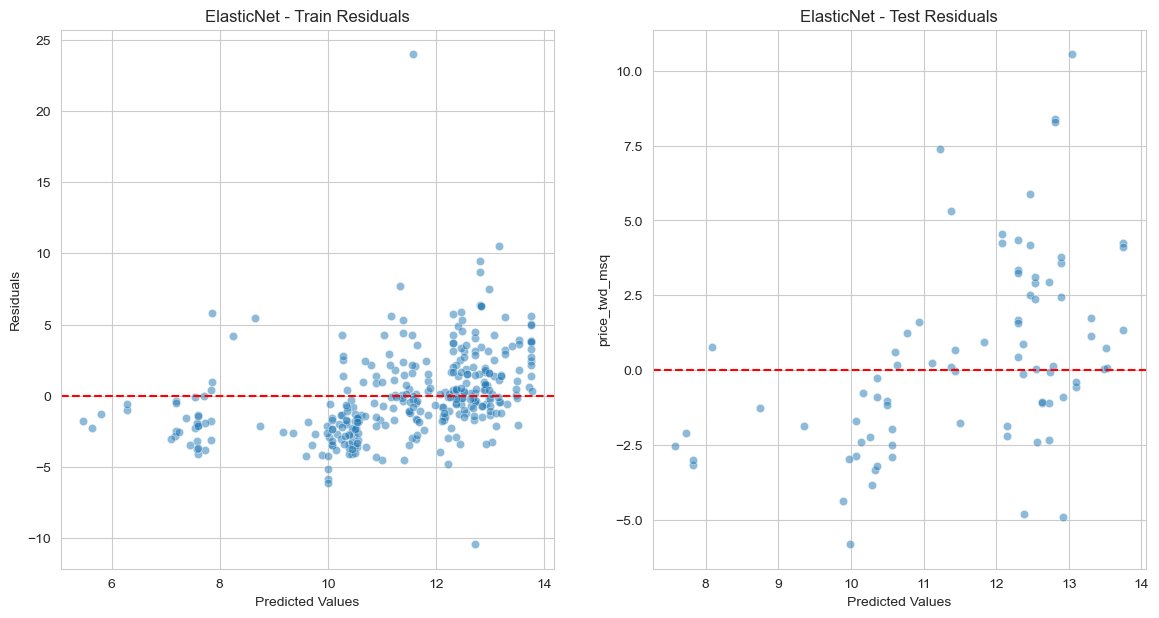

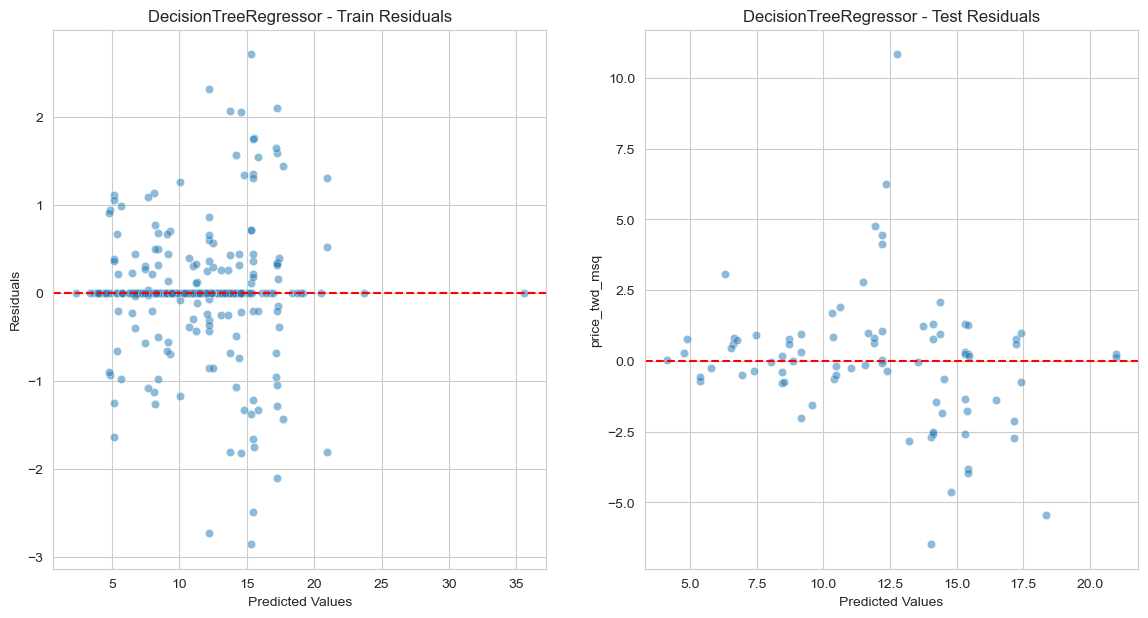

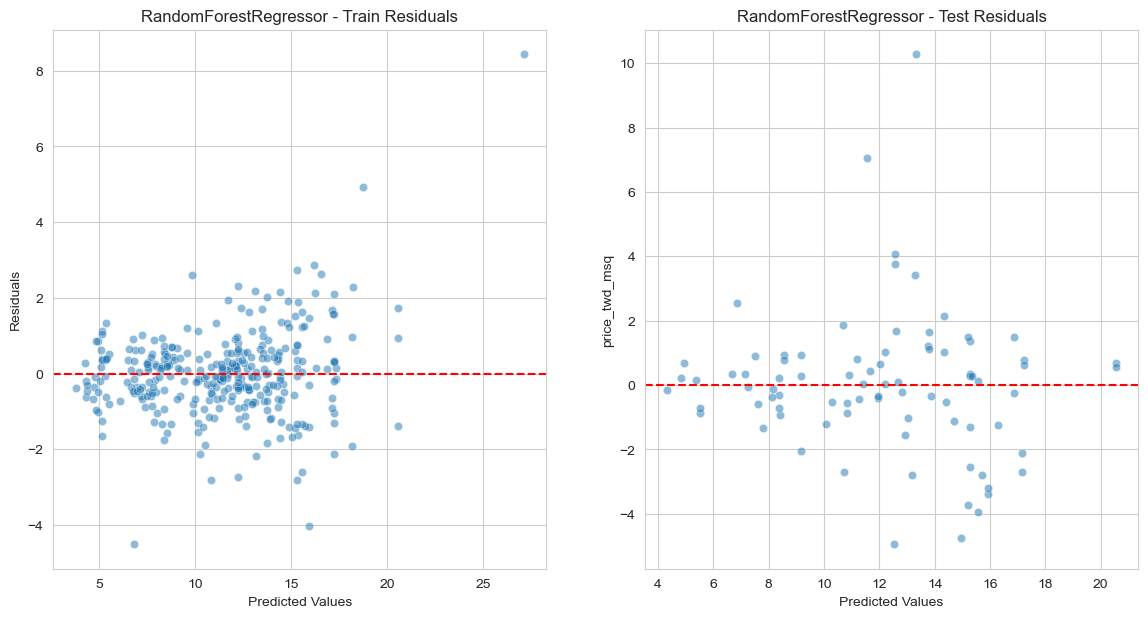

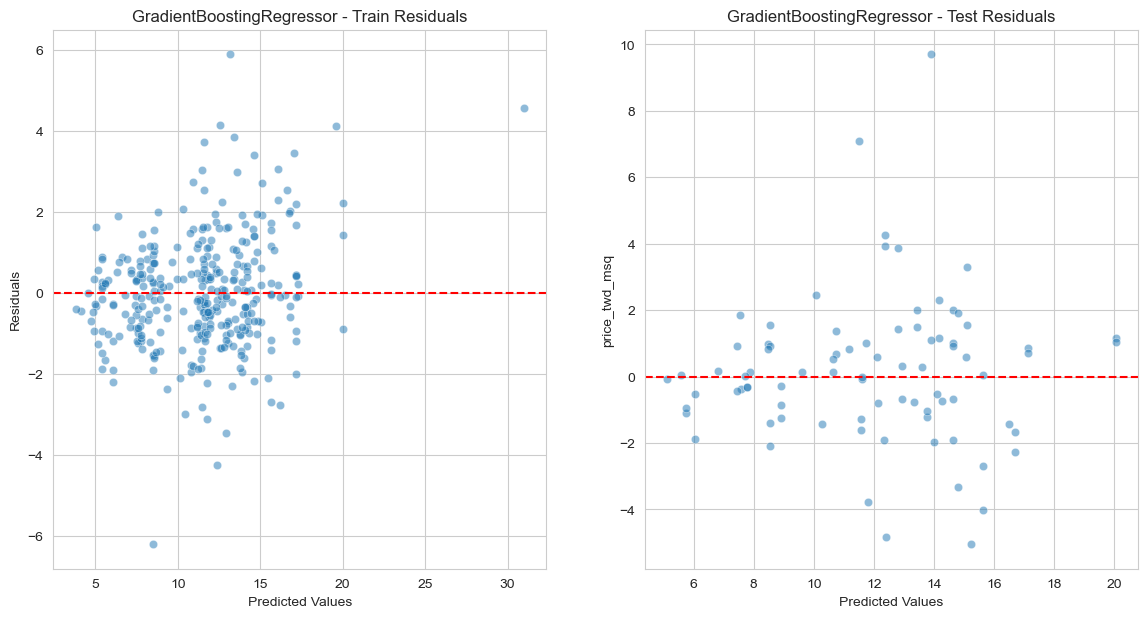

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's define a function that will plot residuals for each model
def plot_residuals(models, X_train, X_test, y_train, y_test):
    for model in models:
        # Fit model
        model.fit(X_train, y_train)
        # Get predictions
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        # Calculate residuals
        train_residuals = y_train - train_predictions
        test_residuals = y_test - test_predictions
        
        # Plotting
        plt.figure(figsize=(14, 7))

        # Train residuals
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=train_predictions, y=train_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'{type(model).__name__} - Train Residuals')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')

        # Test residuals
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=test_predictions, y=test_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'{type(model).__name__} - Test Residuals')
        plt.xlabel('Predicted Values')

        plt.show()

# Plot residuals for all models
plot_residuals(models_to_evaluate, X_train_scaled_df, X_test_scaled, y_train, y_test)


The residual plot shows how far off the predictions are from the actual values. 
Ideally, the residuals should be randomly dispersed around the horizontal line at 0, indicating that the model's errors are random. 
In this plot, there doesn't seem to be a clear pattern to the residuals, which suggests that there aren't any obvious systematic errors in how the model is making predictions.

However, there are a few outliers with large residuals, indicating that the model's predictions for these points are quite far from their actual values. 
These could be due to unusual properties that aren't well-represented by the model's features, or they could be genuine outliers in the data.

### 13. Deployment

- **Action**: Prepare the model for deployment using a tool like Streamlit or Gradio.
- **Learn**: How to create a simple web application that allows users to input data and receive predictions.

Before deployment, we would typically save the model and the scaler object to files so they can be loaded into the deployment environment.

#### Step 1: Save Model and Scaler

After training the model and scaler with the dataset, save them using joblib or pickle.

In [78]:
import joblib

# save the model
joblib.dump(linear_regression_model,'linear_regression_model.joblib')

# save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

####  Step 2: Installing Gradio

In [79]:
# !pip uninstall gradio

In [80]:
# !pip install typing-extensions

In [84]:
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the trained model and scaler objects from file
model = joblib.load('linear_regression_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the prediction function
def predict_price(dist_to_mrt_m, n_convenience, house_age_years):
    # Create a numpy array from the inputs
    features = np.array([[dist_to_mrt_m, n_convenience, house_age_years]])
    
    # Scale the features using the loaded scaler
    features_scaled = scaler.transform(features)
    
    # Make a prediction
    prediction = model.predict(features_scaled)
    
    # Return the prediction
    return {'Price TWD per Sq Meter': prediction[0]}

# Create the Gradio app
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Distance to MRT Station (m)"),
        gr.Slider(minimum=0, maximum=10, step=1, label="Number of Convenience Stores"),
        gr.Number(label="House Age (years)")
    ],
    outputs="number",
    title="Taiwan Real Estate Price Prediction",
    description="Predict the price per square meter of real estate in Taiwan."
)

# Run the app
if __name__ == "__main__":
    iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
